## Keras -- MLPs on MNIST

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal, he_normal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
%matplotlib inline
#%matplotlib
#%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    ax.plot(x, vy, 'b', label="Validation Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [47]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))
print(X_train[0])

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 25

In [48]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [49]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/
# https://keras.io/layers/core/
# https://keras.io/activations/

from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 22

<h2> 2 hidden layer - MLP with Batch normalization and Dropout(0.5) </h2>

In [52]:
%%time
model_relu = Sequential()
model_relu.add(Dense(430, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(322, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 430)               337550    
_________________________________________________________________
batch_normalization_31 (Batc (None, 430)               1720      
_________________________________________________________________
dropout_31 (Dropout)         (None, 430)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 322)               138782    
_________________________________________________________________
batch_normalization_32 (Batc (None, 322)               1288      
_________________________________________________________________
dropout_32 (Dropout)         (None, 322)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

Test score: 0.051465931210145935
Test accuracy: 0.9856


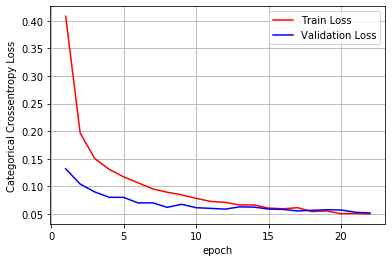

In [53]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

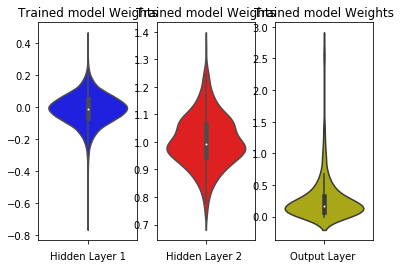

In [54]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3 hidden layer - MLP with Batch normalization and Dropout(0.5) </h2>

In [55]:
%%time
model_relu = Sequential()
model_relu.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(270, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(162, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 320)               251200    
_________________________________________________________________
batch_normalization_33 (Batc (None, 320)               1280      
_________________________________________________________________
dropout_33 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 270)               86670     
_________________________________________________________________
batch_normalization_34 (Batc (None, 270)               1080      
_________________________________________________________________
dropout_34 (Dropout)         (None, 270)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 162)             

Test score: 0.06025076956005068
Test accuracy: 0.982


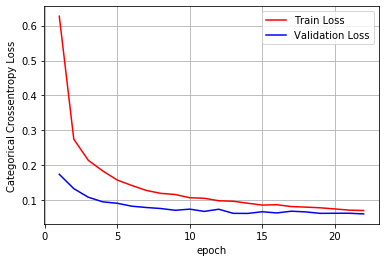

In [56]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

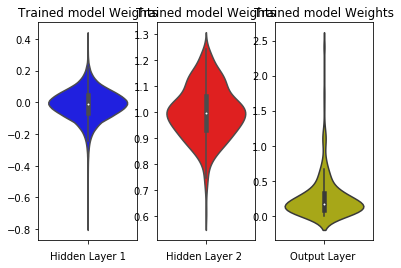

In [57]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5 hidden layer - MLP with Batch normalization and Dropout(0.5) </h2>

In [58]:
%%time
model_relu = Sequential()
model_relu.add(Dense(340, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(190, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(112, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(72, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 340)               266900    
_________________________________________________________________
batch_normalization_36 (Batc (None, 340)               1360      
_________________________________________________________________
dropout_36 (Dropout)         (None, 340)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 190)               64790     
_________________________________________________________________
batch_normalization_37 (Batc (None, 190)               760       
_________________________________________________________________
dropout_37 (Dropout)         (None, 190)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 112)             

Test score: 0.07917401027954184
Test accuracy: 0.9828


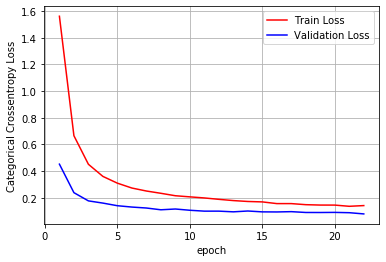

In [59]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

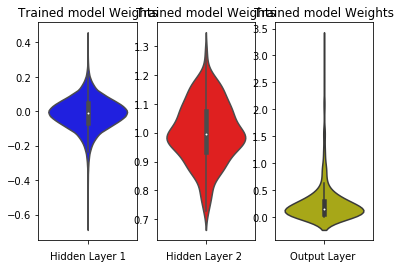

In [60]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2 hidden layer - MLP with Batch normalization and Dropout(0.25) </h2>


In [61]:
%%time
model_relu = Sequential()
model_relu.add(Dense(430, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(322, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 430)               337550    
_________________________________________________________________
batch_normalization_41 (Batc (None, 430)               1720      
_________________________________________________________________
dropout_41 (Dropout)         (None, 430)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 322)               138782    
_________________________________________________________________
batch_normalization_42 (Batc (None, 322)               1288      
_________________________________________________________________
dropout_42 (Dropout)         (None, 322)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

Test score: 0.06104755468893745
Test accuracy: 0.9838


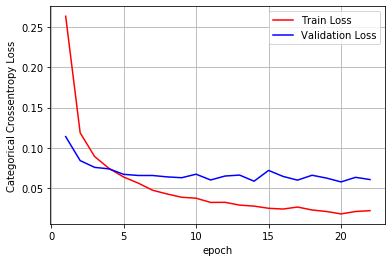

In [62]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

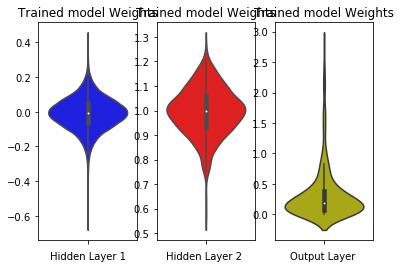

In [63]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3 hidden layer - MLP with Batch normalization and Dropout(0.25) </h2>

In [64]:
%%time
model_relu = Sequential()
model_relu.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(270, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(162, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 320)               251200    
_________________________________________________________________
batch_normalization_43 (Batc (None, 320)               1280      
_________________________________________________________________
dropout_43 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 270)               86670     
_________________________________________________________________
batch_normalization_44 (Batc (None, 270)               1080      
_________________________________________________________________
dropout_44 (Dropout)         (None, 270)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 162)             

Test score: 0.06317311227827886
Test accuracy: 0.9823


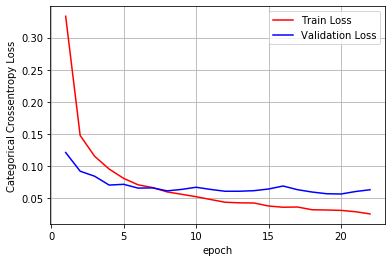

In [65]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

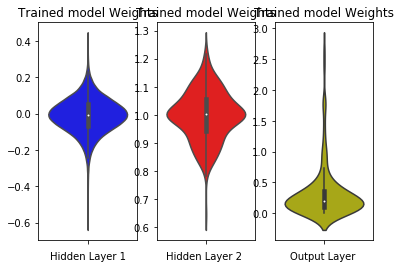

In [66]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5 hidden layer - MLP with Batch normalization and Dropout(0.25) </h2>

In [67]:
%%time
model_relu = Sequential()
model_relu.add(Dense(340, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(190, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(112, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(72, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 340)               266900    
_________________________________________________________________
batch_normalization_46 (Batc (None, 340)               1360      
_________________________________________________________________
dropout_46 (Dropout)         (None, 340)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 190)               64790     
_________________________________________________________________
batch_normalization_47 (Batc (None, 190)               760       
_________________________________________________________________
dropout_47 (Dropout)         (None, 190)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 112)             

Test score: 0.07041437144926749
Test accuracy: 0.9838


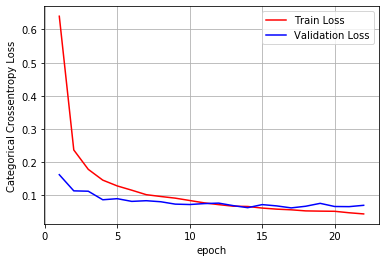

In [68]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

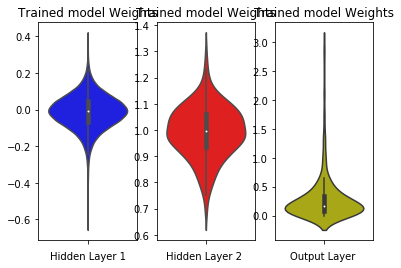

In [69]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2 hidden layer - MLP with Batch normalization,Dropout(0.5) and Mean Squared Error </h2>

In [70]:
%%time
model_relu = Sequential()
model_relu.add(Dense(430, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(322, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 430)               337550    
_________________________________________________________________
batch_normalization_51 (Batc (None, 430)               1720      
_________________________________________________________________
dropout_51 (Dropout)         (None, 430)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 322)               138782    
_________________________________________________________________
batch_normalization_52 (Batc (None, 322)               1288      
_________________________________________________________________
dropout_52 (Dropout)         (None, 322)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)              

Test score: 0.002905523286913556
Test accuracy: 0.9819


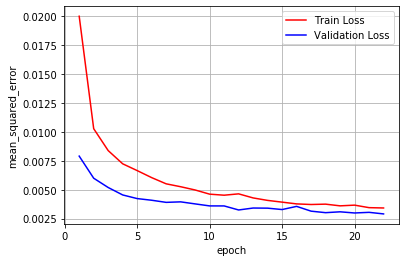

In [71]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('mean_squared_error')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

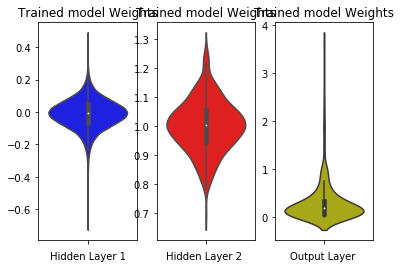

In [72]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3 hidden layer - MLP with Batch normalization,Dropout(0.5) and Mean Squared Error </h2>

In [73]:
%%time
model_relu = Sequential()
model_relu.add(Dense(320, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(270, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(162, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 320)               251200    
_________________________________________________________________
batch_normalization_53 (Batc (None, 320)               1280      
_________________________________________________________________
dropout_53 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 270)               86670     
_________________________________________________________________
batch_normalization_54 (Batc (None, 270)               1080      
_________________________________________________________________
dropout_54 (Dropout)         (None, 270)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 162)             

Test score: 0.0031677277905113464
Test accuracy: 0.98


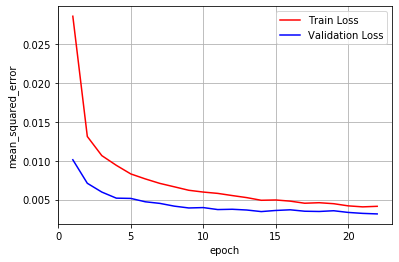

In [74]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('mean_squared_error')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

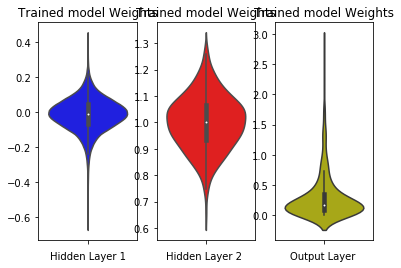

In [75]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5 hidden layer - MLP with Batch normalization,Dropout(0.5) and Mean Squared Error </h2>

In [76]:
%%time
model_relu = Sequential()
model_relu.add(Dense(340, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(190, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(112, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(72, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(38, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 340)               266900    
_________________________________________________________________
batch_normalization_56 (Batc (None, 340)               1360      
_________________________________________________________________
dropout_56 (Dropout)         (None, 340)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 190)               64790     
_________________________________________________________________
batch_normalization_57 (Batc (None, 190)               760       
_________________________________________________________________
dropout_57 (Dropout)         (None, 190)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 112)             

Test score: 0.004310477123901086
Test accuracy: 0.9756


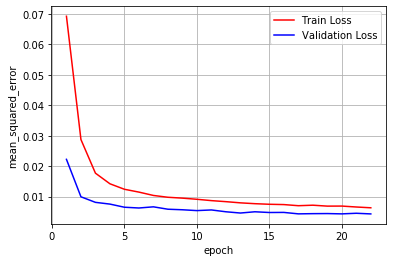

In [77]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('mean_squared_error')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

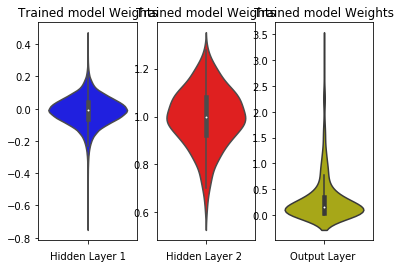

In [78]:
%%time
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Summary:**

In [81]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Activation", "optimizer", "BatchNormalization","LossFunction","Dropout","Hidden Layers","Test score","Test accuracy"]
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.5", "2-(HiddenLayer)[430,322]","0.051","0.99"])
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.5", "3-(HiddenLayer)[320,270,162]","0.061","0.98"])
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.5", "5-(HiddenLayer)[340,190,112,72,38]","0.079","0.98"])
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.25", "2-(HiddenLayer)[430,322]","0.061","0.98"])
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.25", "3-(HiddenLayer)[320,270,162]","0.063","0.98"])
pt.add_row(["relu", "adam", "Yes", "Categorical Crossentropy Loss", "0.25", "5-(HiddenLayer)[340,190,112,72,38]","0.070","0.98"])
pt.add_row(["relu", "adam", "Yes", "mean_squared_error", "0.5", "2-(HiddenLayer)[430,322]","0.003","0.98"])
pt.add_row(["relu", "adam", "Yes", "mean_squared_error", "0.5", "3-(HiddenLayer)[320,270,162]","0.003","0.98"])
pt.add_row(["relu", "adam", "Yes", "mean_squared_error", "0.5", "5-(HiddenLayer)[340,190,112,72,38]","0.004","0.98"])
print(pt)

+------------+-----------+--------------------+-------------------------------+---------+------------------------------------+------------+---------------+
| Activation | optimizer | BatchNormalization |          LossFunction         | Dropout |           Hidden Layers            | Test score | Test accuracy |
+------------+-----------+--------------------+-------------------------------+---------+------------------------------------+------------+---------------+
|    relu    |    adam   |        Yes         | Categorical Crossentropy Loss |   0.5   |      2-(HiddenLayer)[430,322]      |   0.051    |      0.99     |
|    relu    |    adam   |        Yes         | Categorical Crossentropy Loss |   0.5   |    3-(HiddenLayer)[320,270,162]    |   0.061    |      0.98     |
|    relu    |    adam   |        Yes         | Categorical Crossentropy Loss |   0.5   | 5-(HiddenLayer)[340,190,112,72,38] |   0.079    |      0.98     |
|    relu    |    adam   |        Yes         | Categorical Cros

**Conclusion:**

1. From the above model we could see the Dropout (0.5) workes well when compare to the Dropout(0.25).
2. Model test score and accuracy are good when we used the 0.5 as Dropout and Categorical Crossentropy as loss function.
3. Overall model perform well with Dropout 0.5 and with Epoch 20.For graphical representation i have increased the epoch value to 22 and also we see model get overfitting when epoch value incresed more than 35.